In [92]:
import os
from numpy import arange, zeros, floor, array, pi, sin
from matplotlib import pyplot as plt

Solving differential equation:
$$
\frac{\partial^2u}{\partial t^2} = \frac{c^2\partial^2 u }{\partial x^2}
$$

(-2, 2)

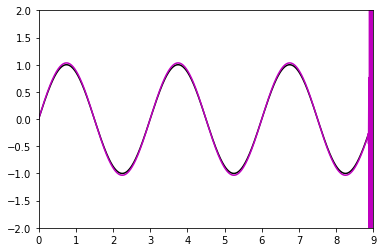

In [179]:
x=arange(0,9,.01)
t=arange(0,1,.001)
c = 3
# Given mesh points as arrays x and t (x[i], t[n])
dx = x[1] - x[0]
dt = t[1] - t[0]
C = c*dt/dx # Courant number
Nt = len(t)-1
Nx = len(x)-1
C2 = C**2 # Help variable in the scheme
# Set initial condition u(x,0) = I(x)
lam = 3
k = 2*pi/lam
omega = k/c
u_1 = sin(k*x)
u = zeros(Nx+1)
u_2 = zeros(Nx+1)
# Apply special formula for first step, incorporating du/dt=0
for i in range(1, Nx):
    u[i] = u_1[i] - 0.5*C2*(u_1[i+1] - 2*u_1[i] + u_1[i-1])
u[0] = 0
u[Nx] = 0 # Enforce boundary conditions
u_2 = u_1 + 0
u_1 = u + 0
plt.plot(x,u,'-k')
plt.xlim(0,Nt)
for n in range(1, 100):
    # Update all inner mesh points at time t[n+1]
    for i in range(1, Nx-1):
        u[i] = 2*u_1[i] - u_2[i] - C2*(u_1[i+1] - 2*u_1[i] + u_1[i-1])
    # Insert boundary conditions
    u[0] = 0
    u[Nx] = 0
    # Switch variables before next step
    u_2 = u_1 + 0
    u_1 = u + 0
    if (max(u)>1000):
        break
plt.plot(x,u,'-m')
plt.xlim(0,9)
plt.ylim(-2,2)

In [184]:
u[-10:]

array([ 2.03637726e+01, -7.20827280e+01,  2.09147672e+02, -5.00698157e+02,
        9.63177681e+02, -1.44590640e+03,  1.59260195e+03, -1.07969226e+03,
       -4.18764803e-02,  0.00000000e+00])

In [185]:
u[0:10]

array([0.        , 0.02164117, 0.04327276, 0.06488554, 0.08646959,
       0.10801611, 0.12951469, 0.1509572 , 0.17233259, 0.19363342])